In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [27]:
X = df.iloc[:, :-1]
y, labels = pd.factorize(df.iloc[:, -1])

In [69]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [65]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

models = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), Birch(n_clusters=3),
          DBSCAN(), SpectralClustering(n_clusters=3)]

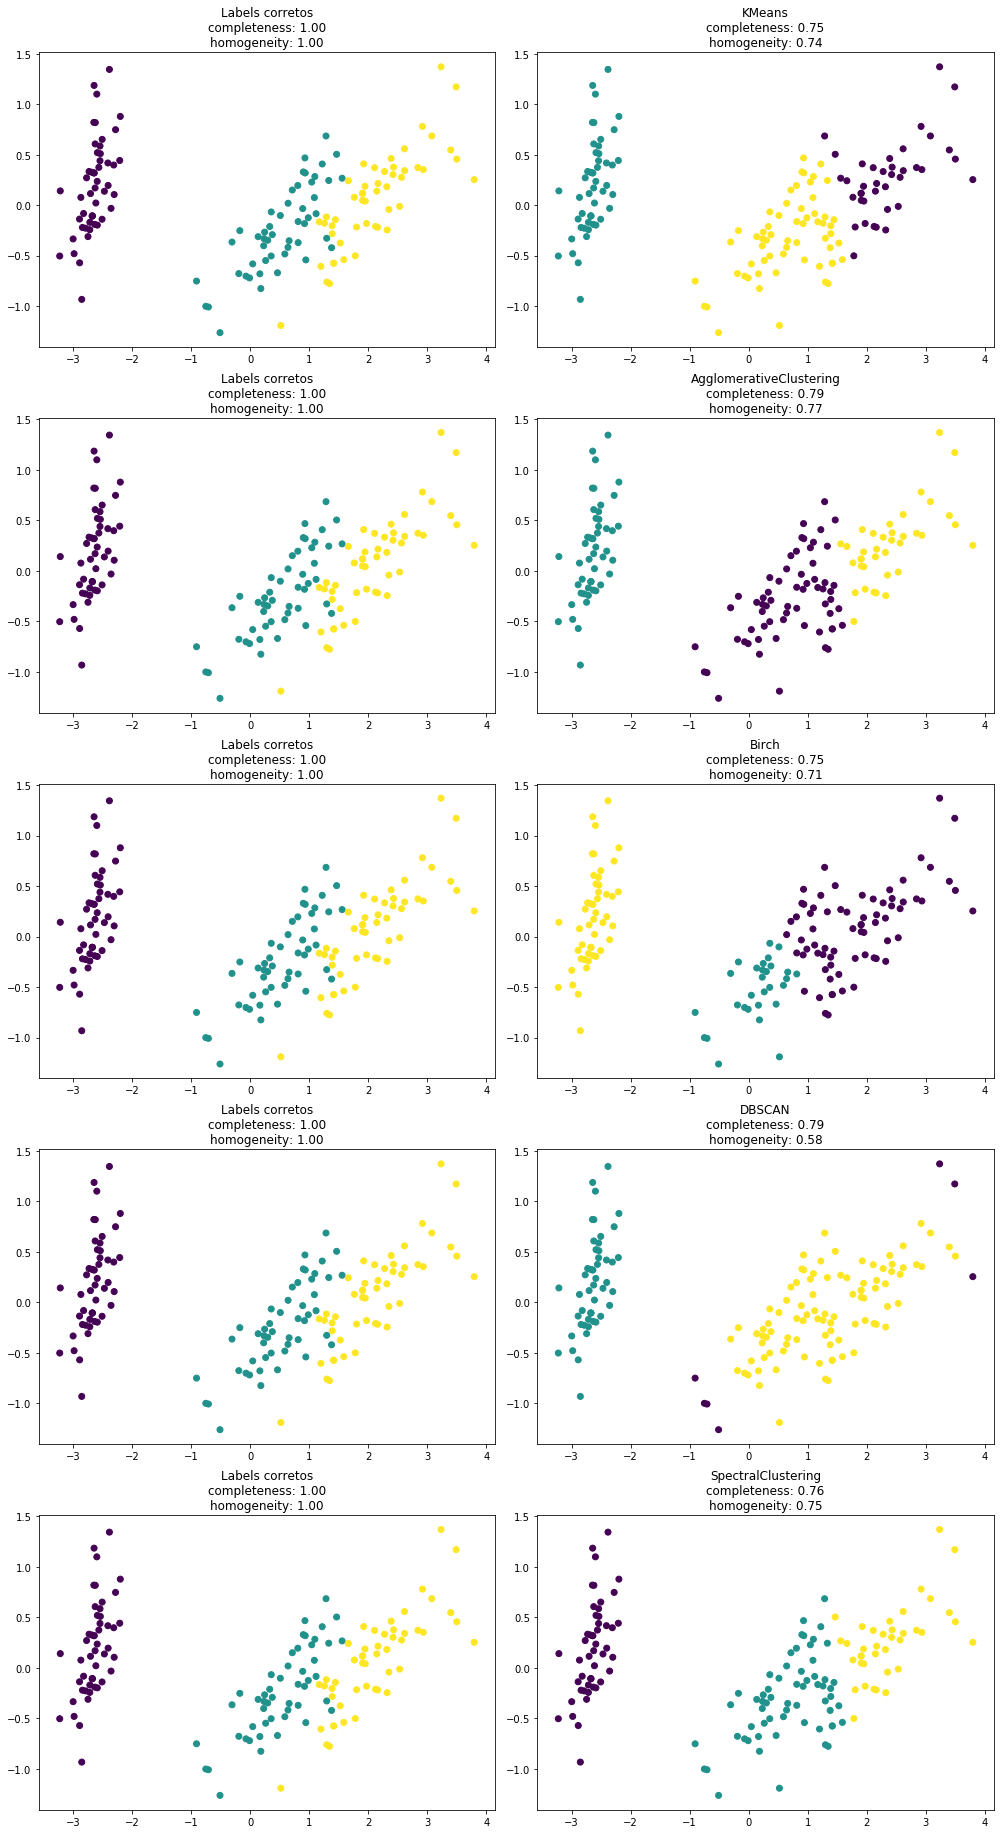

In [84]:
n_models = len(models)

fig, axs = plt.subplots(n_models, 2, figsize=(14, 5*n_models))
plt.tight_layout(h_pad=5.)

completeness_perfect = metrics.completeness_score(y, y)
homogeneity_perfect = metrics.homogeneity_score(y, y)

for i, model in enumerate(models):
    
    axs[i, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    axs[i, 0].set_title("Labels corretos\ncompleteness: {:.2f}\nhomogeneity: {:.2f}"\
                        .format(completeness_perfect, homogeneity_perfect))
    
    y_pred = model.fit_predict(X_pca)
    completeness = metrics.completeness_score(y, y_pred)
    homogeneity = metrics.homogeneity_score(y, y_pred)
   
    axs[i, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    axs[i, 1].set_title("{}\ncompleteness: {:.2f}\nhomogeneity: {:.2f}"\
                        .format(model.__class__.__name__, completeness, homogeneity))

In [105]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

ss = StratifiedKFold(n_splits=3)
n_clusters = np.arange(3, 10, 1)
param_grid = {'n_clusters': n_clusters}
homogeneity = make_scorer(metrics.homogeneity_score)
completeness = make_scorer(metrics.completeness_score)

cv = GridSearchCV(KMeans(), cv=ss, param_grid=param_grid, return_train_score=True, 
                  scoring={'homogeneity': homogeneity,
                           'completeness': completeness},
                  refit="homogeneity")
cv.fit(X_pca, y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_clusters': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit='homogeneity',
       return_train_score=True,
       scoring={'homogeneity': make_scorer(homogeneity_score), 'completeness': make_scorer(completeness_score)},
       verbose=0)

In [116]:
result = pd.DataFrame(cv.cv_results_).set_index('param_n_clusters')

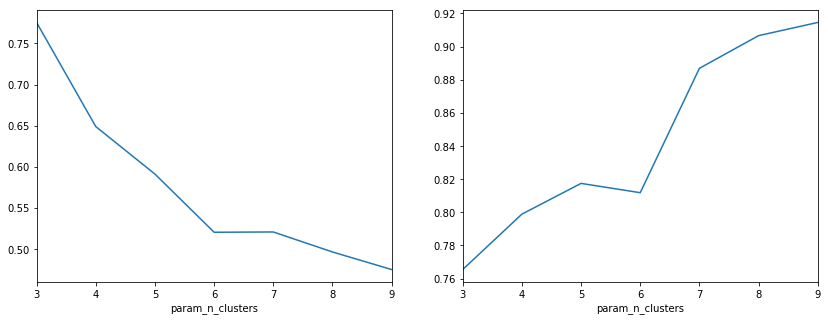

In [114]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 5))

result.mean_train_completeness.plot(ax=ax0)
result.mean_train_homogeneity.plot(ax=ax1)

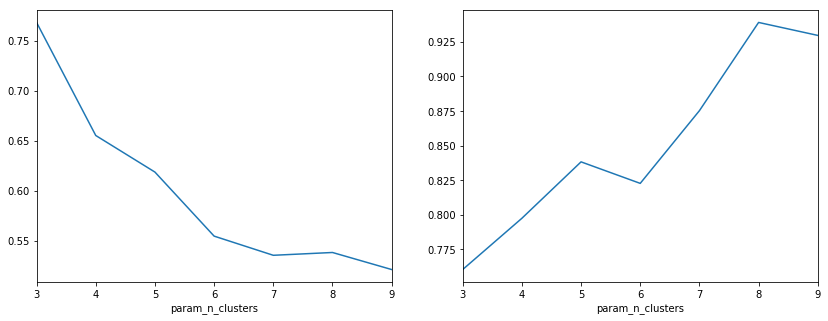

In [115]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 5))

result.mean_test_completeness.plot(ax=ax0)
result.mean_test_homogeneity.plot(ax=ax1)